# MTA Analysis Part 1

### Problem 1
- Open up a new IPython notebook
- Download MTA turnstile data files for the following three dates: ```160903, 160910, 160917```

- Load the files into a pandas DataFrame (hint: `pd.read_csv()` to load files and `pd.concat()` to combine DataFrames)


In [2]:
import pandas as pd

In [3]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [4]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [5]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64

### Problem 2

- Let's turn this into a time series.

- Our pandas dataframe has columns called `Date` and `Time` (what datatype did pandas assign to these columns on import?). However, in python and pandas we can convert date and time information to _datetime_ objects, which allow us to do time-based operations

- Using either [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) in pandas or the [python datetime library](https://docs.python.org/2/library/datetime.html), combine the `Date` and `Time` columns into a single new column of the datetime datatype


In [8]:
import datetime
# from datetime import datetime as dt

In [9]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [10]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,2016-08-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00


Alternatively, pandas is so good that it can even automatically parse datetimes as you load in data if you tell it to, as below.

In [11]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df_2 = get_data_parse_dt(week_nums)
turnstiles_df_2.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2016-08-27 00:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,2016-08-27 04:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,2016-08-27 08:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,2016-08-27 12:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,2016-08-27 16:00:00,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


### Interlude: Duplicate Entries
Now let's run some diagnostics on the data and see approaches to cleaning before tackling problem 3

We can isolate specific turnstiles by creating boolean series masks, then using them to index into the dataframe: 

In [12]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,2016-08-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00


In [13]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
186607,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,00:00:00,REGULAR,12079591,2684445,2016-08-27 00:00:00
186608,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,04:00:00,REGULAR,12079636,2684479,2016-08-27 04:00:00
186609,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,08:00:00,REGULAR,12079894,2684489,2016-08-27 08:00:00
186610,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,12:00:00,REGULAR,12080369,2684533,2016-08-27 12:00:00
186611,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/27/2016,16:00:00,REGULAR,12080831,2684606,2016-08-27 16:00:00


In [14]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
513722,R504,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387264,R155,R116,01-00-03,50 ST,2016-09-15 20:00:00,1
387259,R155,R116,01-00-03,50 ST,2016-09-15 00:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1


In [15]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
170562,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,00:00:00,REGULAR,8137913,1333972,2016-09-16 00:00:00
170563,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,04:00:00,REGULAR,8137913,1333975,2016-09-16 04:00:00
170564,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,REGULAR,8138271,1334066,2016-09-16 08:00:00
170565,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,08:00:00,RECOVR AUD,8138271,16735026,2016-09-16 08:00:00
170566,R504,R276,00-00-01,VERNON-JACKSON,7,IRT,09/16/2016,12:00:00,REGULAR,8139437,1334196,2016-09-16 12:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [16]:
turnstiles_df.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [17]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [18]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2016-08-27 00:00:00,1
387266,R155,R116,01-00-03,50 ST,2016-09-16 04:00:00,1
387260,R155,R116,01-00-03,50 ST,2016-09-15 04:00:00,1
387261,R155,R116,01-00-03,50 ST,2016-09-15 08:00:00,1
387262,R155,R116,01-00-03,50 ST,2016-09-15 12:00:00,1


* No more duplicate Entries

In [19]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

### Problem 3a
- Each combination of `C/A`, `UNIT`, `SCP`, and `STATION` represents a unique turnstile. Take a look at one specific turnstile on a specific date. What does each row in the dataframe represent?
- Obtain the maximum `ENTRIES` value for each day, for each unique turnstile.

Let's take a look at a specific turnstile on a specific date.

Looks like each row represents a turnstile (identified by a combination of  the `C/A`, `UNIT`, `SCP`, and `STATION` columns) at a specific time -- approximately four hours apart. The `ENTRIES` column represents **cumulative entries** at that point in time.

In [20]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "08/27/2016")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,2016-08-27 04:00:00
1441,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,00:00:00,887690958,2016-08-27 00:00:00


The maximum `ENTRIES` value would occur at the last reading of the day. Since rows are listed in descending order of time, we can grab the last reading of the day (located at the top of the group) using the `.first()` DataFrame method.

In [21]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [22]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383


# MTA Analysis Part 2


### Problem 3b
- Work off of the daily maximum `ENTRIES` calculations from Problem 3a. Recall that the `ENTRIES` column contains 
**cumulative entries** on each day. We would now like you to calculate **daily entries**, i.e. the number of new entries gained each day.
- Hint: Group the data by turnstile and use the Pandas `.apply()` method to compute the same differencing function for each turnstile. Check out the `.shift()` and `.diff()` DataFrame methods for this purpose.
- Look through your results. Do they all make sense?

In [23]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/9q/517kb3kd6rz7pq25y7fyk9w00000gn/T/ipykernel_3244/4241375361.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [24]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5800121,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0


In [25]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
95997,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/12/2016,5554,09/11/2016,5554.0
95998,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/13/2016,5554,09/12/2016,5554.0
95999,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/14/2016,5554,09/13/2016,5554.0
96000,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/15/2016,5554,09/14/2016,5554.0
96001,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/16/2016,5554,09/15/2016,5554.0


In [26]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

### Interlude: Reverse Entries

Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [27]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
715,A011,R080,01-00-00,57 ST-7 AV,08/28/2016,887688133,08/27/2016,887689608.0
716,A011,R080,01-00-00,57 ST-7 AV,08/29/2016,887685714,08/28/2016,887688133.0
717,A011,R080,01-00-00,57 ST-7 AV,08/30/2016,887683207,08/29/2016,887685714.0
718,A011,R080,01-00-00,57 ST-7 AV,08/31/2016,887680260,08/30/2016,887683207.0
719,A011,R080,01-00-00,57 ST-7 AV,09/01/2016,887677354,08/31/2016,887680260.0


In [28]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1446,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,20:00:00,887689608,2016-08-27 20:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,887690085,2016-08-27 16:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,887690472,2016-08-27 12:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,887690738,2016-08-27 08:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,887690800,2016-08-27 04:00:00


* Counter working in Reverse??? 

In [29]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-00-00  57 ST-7 AV         20
            01-00-04  57 ST-7 AV         17
            01-00-05  57 ST-7 AV         20
A016  R081  03-06-01  49 ST               1
A025  R023  01-03-02  34 ST-HERALD SQ    20
                                         ..
R550  R072  00-03-0A  34 ST-HUDSON YD     2
R622  R123  00-00-00  FRANKLIN AV        20
R629  R065  00-03-02  ROCKAWAY AV         1
R632  R067  00-00-02  PENNSYLVANIA AV     1
R646  R110  01-00-01  FLATBUSH AV-B.C    20
Length: 83, dtype: int64

In [30]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [31]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

194 1894869683.0
262183 67111299.0
63 1054429.0
2862 2044694.0
1912607049 7509132.0
285 1494569141.0
2542 14129479.0
67108864 0.0
335600216 1374824.0
36 3252790.0
1117 3665497.0
262269 10823938.0
1452 1460387.0
1154413610 8957775.0
100665773 35655801.0
1443 1014193.0
186916568 604712476.0
874 6130902.0
598 11078528.0
1160 74672293.0
0 117440532.0
100663296 1299.0
117440514 100663296.0
2123 9170483.0
428 2336204.0
1024 12498870.0


In [32]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800798,08/27/2016,5800121.0,677.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5802336,08/28/2016,5800798.0,1538.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5803875,08/29/2016,5802336.0,1539.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5805383,08/30/2016,5803875.0,1508.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5806990,08/31/2016,5805383.0,1607.0


### Problem 4

So far we've been operating on a single turnstile level. Now let's
  combine turnstiles that fall within the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstiles -- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together. For each
ControlArea/UNIT/STATION combo, for each day, sum the counts from each
turnstile belonging to that combo. (hint: `pd.groupby`)

In [33]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,08/28/2016,7896.0
1,A002,R051,59 ST,08/29/2016,15462.0
2,A002,R051,59 ST,08/30/2016,16622.0
3,A002,R051,59 ST,08/31/2016,16557.0
4,A002,R051,59 ST,09/01/2016,16464.0


### Problem 5

Similarly, come up with daily time series for each STATION, by adding up all the turnstiles in a station.


In [34]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/28/2016,13871.0
1,1 AV,08/29/2016,18064.0
2,1 AV,08/30/2016,19182.0
3,1 AV,08/31/2016,19616.0
4,1 AV,09/01/2016,20170.0


### Problem 6

Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [35]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,2874102.0
1,GRD CNTRL-42 ST,2477058.0
2,34 ST-HERALD SQ,2069243.0
3,23 ST,2054576.0
4,CANAL ST,1947344.0


# MTA Challenge Pt 3

### Problem 7

We will plot the daily time series for a single turnstile.

In ipython notebook, add this to the beginning of your next cell:
```
    %matplotlib inline
```
This will make your matplotlib graphs integrate nicely with the
notebook. 

To plot the time series, import matplotlib with
```
    import matplotlib.pyplot as plt
```
- Select one turnstile (combination of [`C/A`, `UNIT`, `SCP`, `STATION`])
- Filter your pandas DataFrame so it only represents a single turnstile (make sure that turnstile has entries for multiple days).
- Using matplotlib, create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis

You can use the following as a starting point:
```
    plt.figure(figsize=(10,3))
    plt.plot(<days>,<entries>)
```

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
# single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
# (turnstiles_daily["UNIT"] == "R080") & 
# (turnstiles_daily["SCP"] == "01-00-00") & 
# (turnstiles_daily["STATION"] == "57 ST-7 AV")]

corona_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "R529") &
                                            (turnstiles_daily["UNIT"] == "R208") &
                                            (turnstiles_daily["SCP"] == "00-00-00") &
                                            (turnstiles_daily["STATION"] == "103 ST-CORONA")]

corona_turnstile

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
88139,R529,R208,00-00-00,103 ST-CORONA,08/28/2016,13981647,08/27/2016,13980443.0,1204.0
88140,R529,R208,00-00-00,103 ST-CORONA,08/29/2016,13983365,08/28/2016,13981647.0,1718.0
88141,R529,R208,00-00-00,103 ST-CORONA,08/30/2016,13985217,08/29/2016,13983365.0,1852.0
88142,R529,R208,00-00-00,103 ST-CORONA,08/31/2016,13987124,08/30/2016,13985217.0,1907.0
88143,R529,R208,00-00-00,103 ST-CORONA,09/01/2016,13989049,08/31/2016,13987124.0,1925.0
88144,R529,R208,00-00-00,103 ST-CORONA,09/02/2016,13990809,09/01/2016,13989049.0,1760.0
88145,R529,R208,00-00-00,103 ST-CORONA,09/03/2016,13992116,09/02/2016,13990809.0,1307.0
88146,R529,R208,00-00-00,103 ST-CORONA,09/04/2016,13993205,09/03/2016,13992116.0,1089.0
88147,R529,R208,00-00-00,103 ST-CORONA,09/05/2016,13994209,09/04/2016,13993205.0,1004.0
88148,R529,R208,00-00-00,103 ST-CORONA,09/06/2016,13995920,09/05/2016,13994209.0,1711.0


In [48]:
# single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
# (turnstiles_daily["UNIT"] == "R080") & 
# (turnstiles_daily["SCP"] == "01-00-00") & 
# (turnstiles_daily["STATION"] == "57 ST-7 AV")]

# single_turnstile.head()

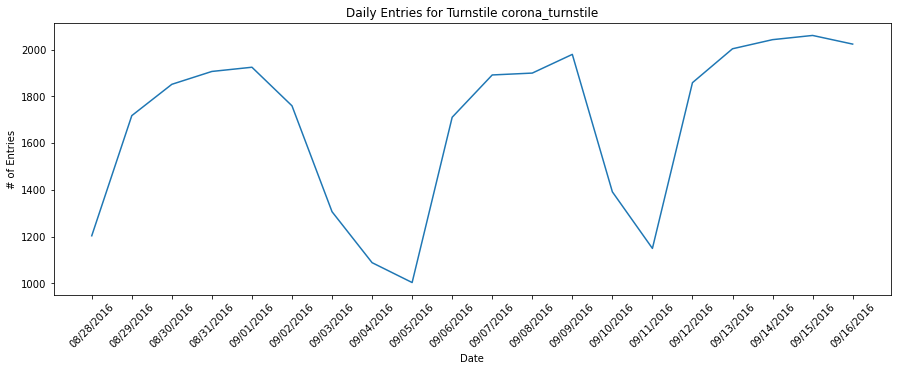

In [50]:
plt.figure(figsize=(15,5))
plt.plot(corona_turnstile['DATE'], corona_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile corona_turnstile');


### Problem 8

Plot the daily time series for a station.

In [38]:
station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()

,STATION,DATE,DAILY_ENTRIES
1680,57 ST-7 AV,08/28/2016,15619.0
1681,57 ST-7 AV,08/29/2016,26132.0
1682,57 ST-7 AV,08/30/2016,28394.0
1683,57 ST-7 AV,08/31/2016,28842.0
1684,57 ST-7 AV,09/01/2016,28142.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

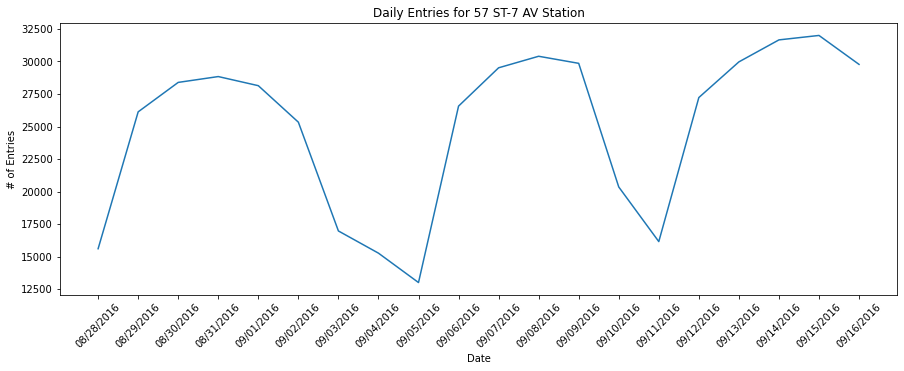

In [39]:
plt.figure(figsize=(15,5))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')


### Problem 9

Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week. (hint: [pandas datetime day of week](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html#pandas.Series.dt.dayofweek) may be useful)

`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.


In [40]:
import numpy as np

In [41]:
station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av.head()

/var/folders/9q/517kb3kd6rz7pq25y7fyk9w00000gn/T/ipykernel_73690/3233257827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
/var/folders/9q/517kb3kd6rz7pq25y7fyk9w00000gn/T/ipykernel_73690/3233257827.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
/var/folders/9q/517kb3kd6rz7pq25y7fyk9w00000gn/T/ipykernel_73690/3233257827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
1680,57 ST-7 AV,08/28/2016,15619.0,6,34
1681,57 ST-7 AV,08/29/2016,26132.0,0,35
1682,57 ST-7 AV,08/30/2016,28394.0,1,35
1683,57 ST-7 AV,08/31/2016,28842.0,2,35
1684,57 ST-7 AV,09/01/2016,28142.0,3,35


Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

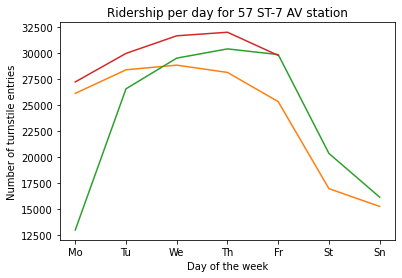

In [42]:
for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

### Problem 10

Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)


(array([270.,  61.,  21.,   5.,   5.,   3.,   4.,   2.,   1.,   1.]),
 array([2.5000000e+01, 2.8743270e+05, 5.7484040e+05, 8.6224810e+05,
        1.1496558e+06, 1.4370635e+06, 1.7244712e+06, 2.0118789e+06,
        2.2992866e+06, 2.5866943e+06, 2.8741020e+06]),
 <BarContainer object of 10 artists>)

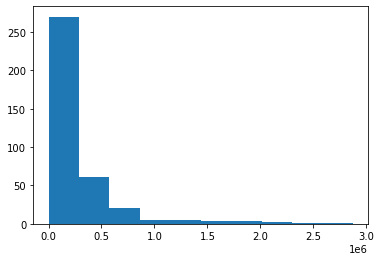

In [43]:
plt.hist(station_totals['DAILY_ENTRIES'])

View top ten stations

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

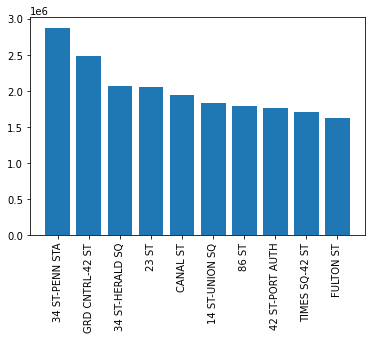

In [45]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)